# Extracción de características:
Métodos como `SIFT, SURF, ORB`, etc., para extraer características clave de ambas imágenes.

## Usando SIFT para extraer caracteristicas

In [24]:

import numpy as np
import cv2
#from matplotlib import pyplot as plt


# load the images
img1 = cv2.imread('1173878dup/18814714.jpg')
img2 = cv2.imread('1173878dup/18814716.jpg')

# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoint1, descriptors1 = sift.detectAndCompute(img1, None)
keypoint2, descriptors2 = sift.detectAndCompute(img2, None)

# finding nearest match with KNN algorithm
index_params = dict(algorithm=0, trees=20)
# index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=150)   # or search_params = dict()

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)
print('cant de matches: ',len(matches))


# Need to draw only good matches, so create a mask
good_matches = [[0, 0] for i in range(len(matches))]

good_points = []
# Good matches
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        good_matches[i] = [1, 0]
        good_points.append([m])

# number_keypoints = 0
# if (len(kp1) <= len(kp2)):
#     number_keypoints = len(kp1)
# else:
#     number_keypoints = len(kp2)

print("GOOD matches",len(good_points))
# print("Que tan bueno es el match", len(good_points) / number_keypoints * 100, "%")
print("Que tan bueno es el match", len(good_points) / len(matches) * 100, "%")


# Draw the matches using drawMatchesKnn()
result = cv2.drawMatchesKnn(img1,
                            keypoint1,
                            img2,
                            keypoint2,
                            matches,
                            outImg=None,
                            matchColor=(0, 155, 0),
                            singlePointColor=(0, 255, 255),
                            matchesMask=good_matches,
                            flags=0
                            )

cv2.imshow("Result", result)  # cv2.resize(result, None, fx=0.4, fy=0.4))
# cv2.imwrite("Feature_matching.jpg", result)

# cv2.imshow("Original", img1)
# cv2.imshow("Duplicate", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


cant de matches:  1073
GOOD matches 0
Que tan bueno es el match 0.0 %


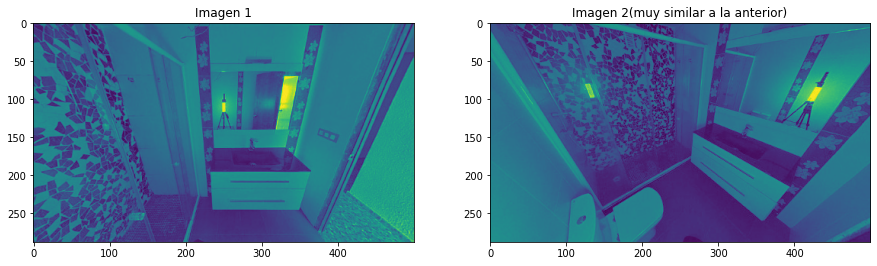

In [22]:
from matplotlib import pyplot as plt

# Mostrar ambas imágenes una al lado de la otra
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Imagen 1')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Imagen 2(muy similar a la anterior)')

plt.show()


## Usando ORB para extraer caracteristicas 
* Take the query image and convert it to grayscale. 
* Now Initialize the ORB detector and detect the keypoints in query image and scene. 
* Compute the descriptors belonging to both the images. 
* Match the keypoints using Brute Force Matcher. 
* Show the matched images. 

In [25]:

import numpy as np
import cv2


# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('1173878dup/18814718.jpg')
train_img = cv2.imread('1173878dup/18814719.jpg')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image and train image
kp1, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
kp2, trainDescriptors = orb.detectAndCompute(train_img_bw, None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(queryDescriptors, trainDescriptors, k=2)
print('cant matches',len(matches))

good_matches = [[0, 0] for i in range(len(matches))]

# good_points = []
# # Good matches
# for i, (m, n) in enumerate(matches):
#     if m.distance < 0.75*n.distance:
#         good_matches[i] = [1, 0]
#         good_points.append((m, n))

if (len(kp1) <= len(kp2)):
    number_keypoints = len(kp1)
else:
    number_keypoints = len(kp2)
    
print('max. num. matches',(number_keypoints))


# print("GOOD matches", len(good_points))
print("Que tan bueno es el match", len(matches) / number_keypoints * 100, "%")

# draw the matches to the final image  containing both the images the drawMatches()
# function takes both images and keypoints and outputs the matched query image with its train image
# final_img = cv2.drawMatchesKnn(query_img, kp1,
#                                train_img, kp2,
#                                matches,
#                                outImg=None,
#                                matchColor=(0, 155, 0),
#                                singlePointColor=(0, 255, 255),
#                                matchesMask=good_matches,
#                                flags=0
#                                )


# Show the final image
# cv2.imshow("Matches", final_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


cant matches 431
max. num. matches 431
Que tan bueno es el match 100.0 %


# Prueba simultanea para diferentes **detectores de keypoints** y  **matchers**

In [26]:
# Empezamos importando las librerías necesarias.
import itertools
import cv2
import numpy as np
from imutils.feature import FeatureDetector_create, \
    DescriptorExtractor_create, DescriptorMatcher_create

# Como parámetros de entrada podemos especificar:
#  1. Las imágenes a ser comparadas.
#  2. El detector de puntos clave a usar.
#  3. El descriptor de features que vamos a usar.
#  4. La función de similitud o "feature matcher" que aplicaremos.
#  5. Un flag para indicar si queremos visualizar los resultados o no.


# detectores de keypoint
all_keypoints = ["DENSE", "FAST", "GFTT"]
#["BRISK", "DENSE", "FAST", "GFTT", "HARRIS", "MSER", "ORB"]

# all_keypoints = ["DOG","SIFT","SURF",]


all_descriptors = ["ORB"]


all_matchers = ["BruteForce", "BruteForce-Hamming", "FlannBased"]
# all_matchers = ["FlannBased"]


for kp, desc in itertools.product(all_keypoints, all_descriptors):

    print('-------', kp, '--', desc, '--------')
    # instanciamos el detector de puntos claves
    detector = FeatureDetector_create(kp)

    # Instanciamos el extractor/descriptor
    extractor = DescriptorExtractor_create(desc)

    # Instanciamos el "feature matcher"

    # matcher = DescriptorMatcher_create(match)
    matcher = cv2.BFMatcher()

    # Cargamos en memoria las imágenes a ser comparadas.
    image1 = cv2.imread('1173878dup/18814714.jpg')
    # image2 = cv2.imread('1173878dup/18814718.jpg')
    image2 = cv2.imread('1173903dup/18815391.jpg')

    # Luego, convertimos ambas imágenes a escala de grises.
    first_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    second_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculamos los puntos clave de las dos imágenes.
    first_keypoints = detector.detect(first_gray)
    second_keypoints = detector.detect(second_gray)

    # Calculamos los vectores descriptivos de ambas imágenes
    first_keypoints, first_features = extractor.compute(first_gray,
                                                        first_keypoints)
    second_keypoints, second_features = extractor.compute(second_gray,
                                                          second_keypoints)

    # Utilizamos KNN para llevar a cabo la vinculación de los
    # vectores de la primera imagen con los de la segunda. El último
    # parámetro indica que queremos los dos vectores más cercanos
    # por cada par.
    raw_matches = matcher.knnMatch(first_features, second_features, 2)
    matches = []

    for match in raw_matches:
        # Tenemos que verificar que cada match sea válido. Para
        # ello, un match debe tener exactamente dos elementos
        # para poder aplicar el test de Lowe, el cual rechaza
        # aquellos matches donde la distancia entre los dos
        # mejores vectores (match[0] y match[1]) esté por encima
        # de 0.8.
        if (len(match) == 2 and
                match[0].distance < match[1].distance * 0.55):
            # Si pasamos la prueba, nos quedamos con el mejor
            # match, match[0]
            matches.append((match[0].trainIdx,
                            match[0].queryIdx))
    # Imprimimos el número de puntos clave de la imagen 1, la
    # imagen 2, así como el número de matches entre ambas.
    print(f'Número de puntos clave en la primera imagen: '
          f'{len(first_keypoints)}')
    print(f'Número de puntos clave en la segunda imagen: '
          f'{len(second_keypoints)}')
    print(f'Número de matches en total: {len(raw_matches)}')
    print(f'Número de matches: {len(matches)}')

    # Ahora es momento de visualizar. Empezamos extrayendo las
    # dimensiones de ambas imágenes.
    first_height, first_width = image1.shape[:2]
    second_height, second_width = image2.shape[:2]
    # Creamos un lienzo sobre el que dibujaremos ambas imágenes
    # junto con líneas que unan los matches entre ellas.
    visualization = np.zeros((max(first_height, second_height),
                              first_width + second_width, 3),
                             dtype='uint8')
    # Añadimos la primera imagen al lado izquierdo de la
    # visualización.
    visualization[:first_height, :first_width] = image1
    # Añadimos la segunda imagen al lado derecho de la
    # visualización.
    visualization[:second_height, first_width:] = image2
    # El ciclo de abajo lo que hace es iterar por cada match,
    # dibujando una línea que parta de la primera imagen,
    # unbicada a la izquierda, y que termine en la segunda,
    # localizada en la parte derecha.
    for train_index, query_index in matches:
        # Escogemos un color aleatorio para la línea.
        color = np.random.randint(0, high=255, size=(3,))
        color = tuple(map(int, color))
        # Calculamos el primer extremo de la línea.
        first_point = (int(first_keypoints[query_index].pt[0]),
                       int(first_keypoints[query_index].pt[1]))
        # Calculamos el segundo extremo de la línea.
        second_point = (int(second_keypoints[train_index].pt[0]
                            + first_width),
                        int(second_keypoints[train_index].pt[1]))
        # Dibujamos la línea.
        cv2.line(visualization, first_point, second_point,
                 color, 2)
    cv2.imshow('Matched', visualization)
    cv2.waitKey(0)
    print('________________________________________')


------- DENSE -- ORB --------
Número de puntos clave en la primera imagen: 2701
Número de puntos clave en la segunda imagen: 3796
Número de matches en total: 2701
Número de matches: 10
________________________________________
------- FAST -- ORB --------
Número de puntos clave en la primera imagen: 2459
Número de puntos clave en la segunda imagen: 1976
Número de matches en total: 2459
Número de matches: 2
________________________________________
------- GFTT -- ORB --------
Número de puntos clave en la primera imagen: 1471
Número de puntos clave en la segunda imagen: 967
Número de matches en total: 1471
Número de matches: 0
________________________________________
